In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [2]:
def H(n):
    if n==0:
        return(np.ones_like(x))
    else:
        E=sym.Symbol('E')
    
        f=np.e**(-E**2)
    
        f=(-1)**n*np.e**E**2*sym.diff(f,E,int(n))
        lf=sym.lambdify(E,f)
        return lf,f

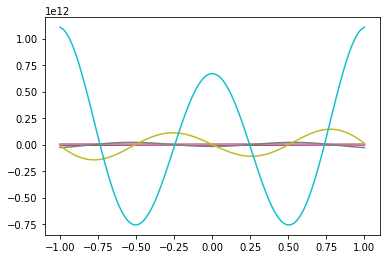

In [3]:
x=np.linspace(-1,1,100)
n=np.linspace(1,20,20)
for i in n:
    y=H(i)[0](x)
    plt.plot(x,y)

In [4]:
def w(n,x):
    if n==1:
        a=2**(n-1)*np.math.factorial(n)*np.sqrt(np.pi)/(n**2*1**2)
    else:
        h=H(n-1)[0]
        h=h(x)
        a=2**(n-1)*np.math.factorial(n)*np.sqrt(np.pi)/(n**2*h**2)
    return a

In [5]:
def GetNewtonRaphsonN(f,df,n,xn,itmax = 100, precision=1e-5):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn

In [6]:
E=sym.Symbol('E')
x=np.linspace(-6,6,100)
n=np.linspace(1,20,20)
Rootsn=[]
for j in n:
    f=H(j)[0]
    df=sym.lambdify(E,sym.diff(H(j)[1],E))

    Roots=[]
    for i in x:
        root=GetNewtonRaphsonN(f,df,j,i)

        if root!=None:

            root=np.round(root,8)

            if root not in Roots:

                Roots.append(root)
    Roots.sort()
    print("Raíces del polinomio de Hermite n="+str(j))
    print(Roots)
    print("")
    Rootsn.append(Roots)

Raíces del polinomio de Hermite n=1.0
[0.0]

Raíces del polinomio de Hermite n=2.0
[-0.70710678, 0.70710678]

Raíces del polinomio de Hermite n=3.0
[-1.22474487, 0.0, 1.22474487]

Raíces del polinomio de Hermite n=4.0
[-1.65068012, -0.52464762, 0.52464762, 1.65068012]

Raíces del polinomio de Hermite n=5.0
[-2.02018287, -0.95857246, -0.0, 0.95857246, 2.02018287]

Raíces del polinomio de Hermite n=6.0
[-2.35060497, -1.33584907, -0.43607741, 0.43607741, 1.33584907, 2.35060497]

Raíces del polinomio de Hermite n=7.0
[-2.65196136, -1.67355163, -0.81628788, 0.0, 0.81628788, 1.67355163, 2.65196136]

Raíces del polinomio de Hermite n=8.0
[-2.93063742, -1.98165676, -1.15719371, -0.38118699, 0.38118699, 1.15719371, 1.98165676, 2.93063742]

Raíces del polinomio de Hermite n=9.0
[-3.1909932, -2.26658058, -1.46855329, -0.72355102, 0.0, 0.72355102, 1.46855329, 2.26658058, 3.1909932]

Raíces del polinomio de Hermite n=10.0
[-3.43615912, -2.53273167, -1.75668365, -1.03661083, -0.34290133, 0.34290133,

In [7]:
Pesosn=[]
for i in n:
    i=int(i)
    pesos=[]
    for j in Rootsn[i-1]:
        pesos.append(w(i,j))
    print("Pesos del polinomio de Hermite n="+str(i))
    print(pesos)
    print("")
    Pesosn.append(pesos)

Pesos del polinomio de Hermite n=1
[1.7724538509055159]

Pesos del polinomio de Hermite n=2
[0.8862269284269915, 0.8862269284269915]

Pesos del polinomio de Hermite n=3
[0.2954089771648304, 1.1816359006036774, 0.2954089771648304]

Pesos del polinomio de Hermite n=4
[0.08131283753346821, 0.8049140955380845, 0.8049140955380845, 0.08131283753346821]

Pesos del polinomio de Hermite n=5
[0.01995324213258365, 0.39361933011564965, 0.9453087204829418, 0.39361933011564965, 0.01995324213258365]

Pesos del polinomio de Hermite n=6
[0.004530010062016703, 0.15706732369144386, 0.7246295976608581, 0.7246295976608581, 0.15706732369144386, 0.004530010062016703]

Pesos del polinomio de Hermite n=7
[0.0009717812124755068, 0.0545155823693299, 0.4256072565831515, 0.8102646175568073, 0.4256072565831515, 0.0545155823693299, 0.0009717812124755068]

Pesos del polinomio de Hermite n=8
[0.00019960407281328422, 0.017077982560127134, 0.20780232816837688, 0.6611470127672391, 0.6611470127672391, 0.20780232816837688,

In [25]:
def f(n,x):
    h=H(n)[0]
    h=h(x)
    return (abs(1/np.sqrt(2**n*np.math.factorial(n))*(np.pi)**0.25*h))**2*x**2            

In [33]:
n=1
ws=Pesosn[n-1]
xs=Rootsn[n-1]
res=0
for i in range(len(ws)):
    res+=ws[i]*f(n,xs[i])
print(res)

0.0


In [27]:
print("Como se evalua la Ecuación en x=xi, dónde xi es una raíz,")
print("y la Ecuación tiene un multiplo que es Hn, la Ecuación siempre dará 0")

Como se evalua la Ecuación en x=xi, dónde xi es una raíz,
y la Ecuación tiene un multiplo que es Hn, la Ecuación siempre dará 0


In [28]:
print("Este tipo de estimaciones no sirve si la ecuación depende de Hn")

Este tipo de estimaciones no sirve si la ecuación depende de Hn
